# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## Import packages

In [1]:
import pandas as pd
import numpy as np

---
## Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [4]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721,1
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,1
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

---

## Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv("/Users/zhenliu15471/code/zliu15471/BCG/raw_data/price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.335085
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916


### Contract duration 

In [8]:
df['contract_duration']=((df['date_end']-df['date_activ'])/ np.timedelta64(1,'M')).astype(int)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,contract_duration
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,36
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,84
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,72
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,72
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,73


In [9]:
#set the reference time to be 2016-01-01
#write a finction to caculate the month difference between datetime features
def calculatemonth(referencetime,dataframe,column):
    time_diff=referencetime-dataframe[column]
    months=(time_diff/np.timedelta64(1,'M')).astype(int)
    return months

In [10]:
referencetime=pd.to_datetime('2016-01-01')

In [11]:
df['activ_diff']=calculatemonth(referencetime,df,'date_activ')
df['end_diff']=calculatemonth(referencetime,df,'date_end')
df['modif_diff']=calculatemonth(referencetime,df,'date_modif_prod')
df['renewal_diff']=calculatemonth(referencetime,df,'date_renewal')
df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,8.145777,42.629663,12.311304,8.182687,1,36,30,-5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.592310,0.000000,0.000000,0,84,76,-7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.612508,0.088409,0.000000,0,72,68,-3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.593296,0.000000,0.000000,0,72,69,-2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.291555,40.848791,24.539003,16.365274,0,73,71,-2,71,9


In [12]:
#Remove the date columns 
df.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],axis=1,inplace=True)

In [13]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,8.145777,42.629663,12.311304,8.182687,1,36,30,-5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,44.592310,0.000000,0.000000,0,84,76,-7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000000,44.612508,0.088409,0.000000,0,72,68,-3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,44.593296,0.000000,0.000000,0,72,69,-2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,16.291555,40.848791,24.539003,16.365274,0,73,71,-2,71,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,4648.01,0,0.0,18.57,0.138305,...,0.000000,44.584882,0.000000,0.000000,0,47,43,-4,7,19
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,631.69,181,0.0,144.03,0.100167,...,8.367731,59.275820,36.583870,8.438721,1,48,40,-7,40,4
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,190.39,179,0.0,129.60,0.116900,...,16.291555,40.848791,24.539003,16.365274,1,47,46,-1,46,10
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,19.34,0,0.0,7.18,0.145711,...,0.000000,44.592310,0.000000,0.000000,0,48,40,-7,40,4


### Categorical Data

In [15]:

#For the column has_gas,replace t for 1 and f for 0
df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])

In [19]:
df['channel_sales']=df['channel_sales'].fillna('null_values_channel')
df['channel_sales']=df['channel_sales'].apply(lambda x:x[:4])
categories_channel=pd.get_dummies(df[['channel_sales']])
categories_channel.drop(columns=['channel_sales_MISS'],inplace=True)
categories_channel.head()

,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0


In [20]:
#for the column origin_up, first fill the null value 
df['origin_up']=df['origin_up'].fillna('null_values_origin')

In [21]:
df['origin_up']=df['origin_up'].apply(lambda x:x[:4])
categories_origin= pd.get_dummies(df[['origin_up']])
categories_origin.drop(columns=['origin_up_MISS'],inplace=True)
categories_origin.head()

,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [22]:
#Use the common index to merge 
df=pd.merge(df,categories_channel,left_index=True,right_index=True)
df=pd.merge(df,categories_origin,left_index=True,right_index=True)
df=df.drop(['channel_sales','origin_up'],axis=1)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,1,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,1,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,0,0,0,0,1,0,0,0


### Numerical data

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


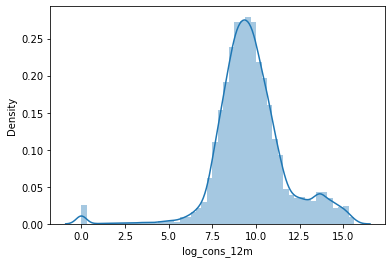

In [30]:
import seaborn as sns

#First for the cons_12, remove the negative values and apply a log tranformation
df.loc[df.cons_12m<0,'cons_12m']=np.nan
df['cons_12m']=df['cons_12m'].dropna()
df['log_cons_12m']=df['cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_cons_12m']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


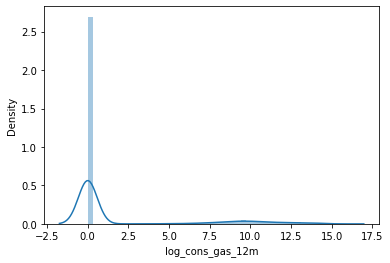

In [29]:
df.loc[df.cons_gas_12m<0,'cons_gas_12m']=np.nan
df['log_cons_gas_12m']=df['cons_gas_12m'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_cons_gas_12m']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


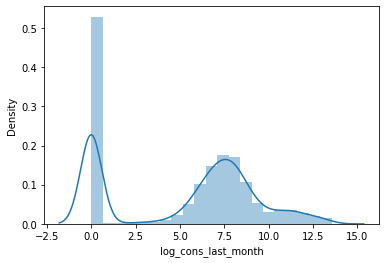

In [32]:
df.loc[df.cons_last_month<0,'cons_last_month']=np.nan
df['cons_last_month']=df['cons_last_month'].dropna()
df['log_cons_last_month']=df['cons_last_month'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_cons_last_month']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


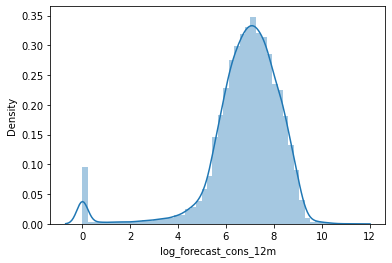

In [33]:

df.loc[df.forecast_cons_12m<0,'forecast_cons_12m']=np.nan
df['forecast_cons_12m']=df['forecast_cons_12m'].dropna()
df['log_forecast_cons_12m']=df['forecast_cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_forecast_cons_12m']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


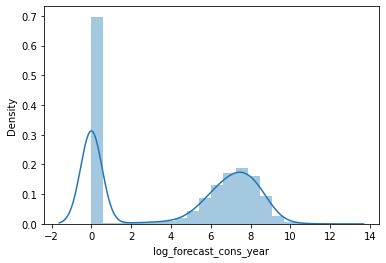

In [34]:
df.loc[df.forecast_cons_year<0,'forecast_cons_year']=np.nan
df['forecast_cons_year']=df['forecast_cons_year'].dropna()
df['log_forecast_cons_year']=df['forecast_cons_year'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_forecast_cons_year']);

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_forecast_meter_rent_12m', ylabel='Density'>

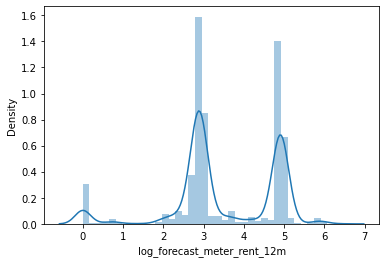

In [35]:
df.loc[df.forecast_meter_rent_12m<0,'forecast_meter_rent_12m']=np.nan
df['forecast_meter_rent_12m']=df['forecast_meter_rent_12m'].dropna()
df['log_forecast_meter_rent_12m']=df['forecast_meter_rent_12m'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_forecast_meter_rent_12m'])

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


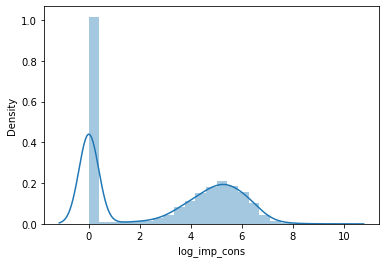

In [37]:

df.loc[df.imp_cons<0,'imp_cons']=np.nan
df['imp_cons']=df['imp_cons'].dropna()
df['log_imp_cons']=df['imp_cons'].apply(lambda x:np.log(1+x))
sns.distplot(df['log_imp_cons']);

In [38]:
df=df.drop(['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','imp_cons'],axis=1)
df.head()

,id,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,...,origin_up_ldks,origin_up_lxid,origin_up_usap,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,...,0,1,0,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,...,0,0,0,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000
2,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,...,0,0,0,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000
3,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,...,0,0,0,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,...,0,0,0,8.395252,0.000000,6.267201,6.101999,6.267201,4.888317,3.976311


### Remove outliers

In [44]:
#I will use IQR method to detect outliers
def remove_outliers(df,col):
    df.loc[df[col]<0,col]=df[col].mean()
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    iqr=q3-q1
    upper_bound=q3+(iqr*1.5)
    lower_bound=q1-(iqr*1.5)
    df=df[(lower_bound<df[col])|(df[col]<upper_bound)]

In [47]:
df.columns

Index(['id', 'forecast_discount_energy', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix',
       'mean_3m_price_p3_fix', 'mean_3m_price_p1', 'mean_3m_price_p2',
       'mean_3m_price_p3', 'churn', 'contract_duration

In [49]:
remove_outliers(df,'mean_year_price_p1_var')
remove_outliers(df,'mean_year_price_p2_var')
remove_outliers(df,'mean_year_price_p3_var')
remove_outliers(df,'mean_year_price_p1_fix')
remove_outliers(df,'mean_year_price_p2_fix')
remove_outliers(df,'mean_year_price_p3_fix')
remove_outliers(df,'mean_year_price_p1')
remove_outliers(df,'mean_year_price_p2')
remove_outliers(df,'mean_year_price_p3')
remove_outliers(df,'log_cons_12m')
remove_outliers(df,'log_cons_gas_12m')
remove_outliers(df,'log_cons_last_month')
remove_outliers(df,'log_forecast_cons_12m')
remove_outliers(df,'log_forecast_meter_rent_12m')
remove_outliers(df,'log_forecast_cons_year')
remove_outliers(df,'log_imp_cons')
remove_outliers(df,'forecast_discount_energy')
remove_outliers(df,'forecast_price_energy_off_peak')
remove_outliers(df,'forecast_price_energy_peak')
remove_outliers(df,'forecast_price_pow_off_peak')
remove_outliers(df,'margin_gross_pow_ele')
remove_outliers(df,'margin_net_pow_ele')
remove_outliers(df,'net_margin')
remove_outliers(df,'pow_max')


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14605 non-null  object 
 1   forecast_discount_energy        14605 non-null  float64
 2   forecast_price_energy_off_peak  14605 non-null  float64
 3   forecast_price_energy_peak      14605 non-null  float64
 4   forecast_price_pow_off_peak     14605 non-null  float64
 5   has_gas                         14605 non-null  int64  
 6   margin_gross_pow_ele            14605 non-null  float64
 7   margin_net_pow_ele              14605 non-null  float64
 8   nb_prod_act                     14605 non-null  int64  
 9   net_margin                      14605 non-null  float64
 10  num_years_antig                 14605 non-null  int64  
 11  pow_max                         14605 non-null  float64
 12  mean_year_price_p1_var          

# Modeling and evaluation 

## Base model
\
We are going to quickly test the fit of 6 different models

Logistic Regression: basic linear classifier (good to baseline)\
Random Forest: ensemble bagging classifier\
K-Nearest Neighbors: instance based classifier\
Support Vector Machines: maximum margin classifier\
Gaussian Naive Bayes: probabilistic classifier\
XGBoost: ensemble (extreme!) boosting classifier

In [62]:
#First we need to specify features and target 
y=df['churn']
X=df.drop(['churn','id'],axis=1)

In [63]:
#Check the binary target
y.value_counts()

0    13186
1     1419
Name: churn, dtype: int64

In [64]:
#Spliting dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs=[]
    models =[('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier ()),
        ('KNN', KNeighborsClassifier ()),
        ('SVM', SVC()), 
        ('GNB', GaussianNB()),
        ('XGB', XGBClassifier(eval_metric='mlogloss'))
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final

In [66]:

run_exps(X_train,y_train,X_test,y_test)

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

LogReg
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2645
      benign       0.11      0.00      0.01       276

    accuracy                           0.90      2921
   macro avg       0.51      0.50      0.48      2921
weighted avg       0.83      0.90      0.86      2921

RF
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2645
      benign       0.88      0.05      0.10       276

    accuracy                           0.91      2921
   macro avg       0.89      0.52      0.52      2921
weighted avg       0.91      0.91      0.87      2921

KNN
              precision    recall  f1-score   support

   malignant       0.91      0.99      0.95      2645
      benign       0.27      0.03      0.05       276

    accuracy                           0.90      2921
   macro avg       0.59      0.51      0.50      2921
weighted avg       0.85      0.90      0.86      2921



/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

SVM
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2645
      benign       0.00      0.00      0.00       276

    accuracy                           0.91      2921
   macro avg       0.45      0.50      0.48      2921
weighted avg       0.82      0.91      0.86      2921

GNB
              precision    recall  f1-score   support

   malignant       0.93      0.55      0.69      2645
      benign       0.12      0.58      0.20       276

    accuracy                           0.55      2921
   macro avg       0.52      0.57      0.44      2921
weighted avg       0.85      0.55      0.64      2921



/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

XGB
              precision    recall  f1-score   support

   malignant       0.92      0.99      0.95      2645
      benign       0.67      0.14      0.23       276

    accuracy                           0.91      2921
   macro avg       0.79      0.57      0.59      2921
weighted avg       0.89      0.91      0.89      2921



,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.168217,0.006983,0.912281,0.835997,0.912281,0.872474,0.632869,LogReg
1,0.164942,0.006549,0.900727,0.833419,0.900727,0.855717,0.616682,LogReg
2,0.198753,0.008800,0.884467,0.820168,0.884467,0.834249,0.597283,LogReg
3,0.150999,0.006872,0.908430,0.871666,0.908430,0.866482,0.634431,LogReg
4,0.224757,0.005981,0.898973,0.848106,0.898973,0.854376,0.632013,LogReg
5,1.815935,0.067298,0.916988,0.895410,0.916988,0.885367,0.662060,RF
6,1.785412,0.067504,0.907574,0.905269,0.907574,0.869960,0.682550,RF
7,1.819507,0.066918,0.889174,0.881391,0.889174,0.841376,0.685705,RF
8,1.758767,0.070967,0.913136,0.920717,0.913136,0.875933,0.678997,RF
9,1.814790,0.068642,0.904110,0.885038,0.904110,0.868014,0.663902,RF


In [67]:
final=run_exps(X_train,y_train,X_test,y_test)
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model==model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

LogReg
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2645
      benign       0.11      0.00      0.01       276

    accuracy                           0.90      2921
   macro avg       0.51      0.50      0.48      2921
weighted avg       0.83      0.90      0.86      2921

RF
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2645
      benign       0.94      0.05      0.10       276

    accuracy                           0.91      2921
   macro avg       0.92      0.53      0.53      2921
weighted avg       0.91      0.91      0.87      2921

KNN
              precision    recall  f1-score   support

   malignant       0.91      0.99      0.95      2645
      benign       0.27      0.03      0.05       276

    accuracy                           0.90      2921
   macro avg       0.59      0.51      0.50      2921
weighted avg       0.85      0.90      0.86      2921



/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

SVM
              precision    recall  f1-score   support

   malignant       0.91      1.00      0.95      2645
      benign       0.00      0.00      0.00       276

    accuracy                           0.91      2921
   macro avg       0.45      0.50      0.48      2921
weighted avg       0.82      0.91      0.86      2921

GNB
              precision    recall  f1-score   support

   malignant       0.93      0.55      0.69      2645
      benign       0.12      0.58      0.20       276

    accuracy                           0.55      2921
   macro avg       0.52      0.57      0.44      2921
weighted avg       0.85      0.55      0.64      2921



/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

XGB
              precision    recall  f1-score   support

   malignant       0.92      0.99      0.95      2645
      benign       0.67      0.14      0.23       276

    accuracy                           0.91      2921
   macro avg       0.79      0.57      0.59      2921
weighted avg       0.89      0.91      0.89      2921



In [70]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_f1_weighted            \
                        std      mean              std      mean   
model                                                              
GNB                0.098456  0.518456         0.090246  0.603911   
KNN                0.007174  0.894744         0.012124  0.857178   
LogReg             0.009991  0.901863         0.013604  0.857826   
RF                 0.008297  0.906751         0.012552  0.869908   
SVM                0.011197  0.899408         0.016184  0.851811   
XGB                0.007903  0.907764         0.012506  0.880255   

       test_accuracy           test_roc_auc           test_precision_weighted  \
                 std      mean          std      mean                     std   
model                                                                           
GNB         0.098456  0.518456     0.021193  0.600880                0.015868   
KNN         0.007174  0.894744     0.019953  0.564557                0.011148   
LogReg      0.009991  0.901863     0.014678  0.623408                0.019733   
RF          0.008297  0.906751     0.013192  0.674895                0.015075   
SVM         0.011197  0.899408     0.028607  0.537309                0.020132   
XGB         0.007903  0.907764     0.006194  0.680794                0.006028   

                  
            mean  
model             
GNB     0.847473  
KNN     0.839377  
LogReg  0.844717  
RF      0.891860  
SVM     0.809056  
XGB     0.886804

In [71]:

time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
GNB      0.000121  0.006295  0.000103  0.004413
KNN      0.005199  0.167789  0.000094  0.002773
LogReg   0.001301  0.007139  0.030377  0.209031
RF       0.001190  0.065934  0.046212  1.785841
SVM      0.052633  1.425721  0.021326  1.073206
XGB      0.001560  0.014019  0.089456  0.951959

Based on the metrics performance and time fitting performance, the random forest and XGBoost are the best models and in this case the XGBoost is used.

### Mode fine tuning 

In [79]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [80]:
#Create the random grid
params={
    'min_child_weight':[i for i in np.arange(1,15,1)],
    'gamma':[i for i in np.arange(0,6,0.5)],
    'subsample':[i for i in np.arange(0,1.1,0.1)],
    'colsample_bytree':[i for i in np.arange(0,1.1,0.1)],
    'max_depth':[i for i in np.arange(1,15,1)],
    'scale_pos_weight':[i for i in np.arange(0,0.15,0.01)],
    'learning_rate':[i for i in np.arange(0,0.15,0.01)],
    'n_estimators':[i for i in np.arange(0,2000,100)],
}

In [77]:
xg=xgb.XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

In [81]:
#Random search of parameters,using 5
xg_random=RandomizedSearchCV(xg,param_distributions=params,
                            n_iter=1,scoring='roc_auc',
                            n_jobs=4,cv=5,verbose=3,random_state=1001)
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=n...
                                        'n_estimators': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900],
                                        'scale_pos_weight': [0.0, 0.01, 0.02,
                                                             0.03, 0.04, 0.05,
                                                             0.06, 0.07, 0.08,
                                                             0.09, 0.1, 0.11,
                                                             0.12, 0.13, 0.14],
                                        'subsample': [0.0, 0.1, 0.2,
                                                      0.30000000000000004, 0.4,
                                                      0.5, 0.6000000000000001,
                                                      0.7000000000000001, 0.8,
                                                      0.9, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [83]:
best_random=xg_random.best_params_
best_random

In [92]:
best_random={'subsample':0.8,
'scale_pos_weight':1,
'n_estimators':1100,
'max_depth':12,
'learning_rate':0.01,
'gamma':4.0,
'colsample_bytree':0.60}

In [98]:
model_grid=xgb.XGBClassifier(objective='binary:logistic',
                            nthread=1,eval_metric='mlogloss',**best_random)
                              
fprs,tprs,score=[],[],[]

In [99]:

for (train,test), i in zip(cv.split(X,y),range(5)):
    model_grid.fit(X.iloc[train],y.iloc[train])
    _,_,auc_score_train=compute_roc_auc(model_grid,train)
    fpr,tpr,auc_score=compute_roc_auc(model_grid,test)
    score.append((auc_score_train,auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/zhenliu15471/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/zhe

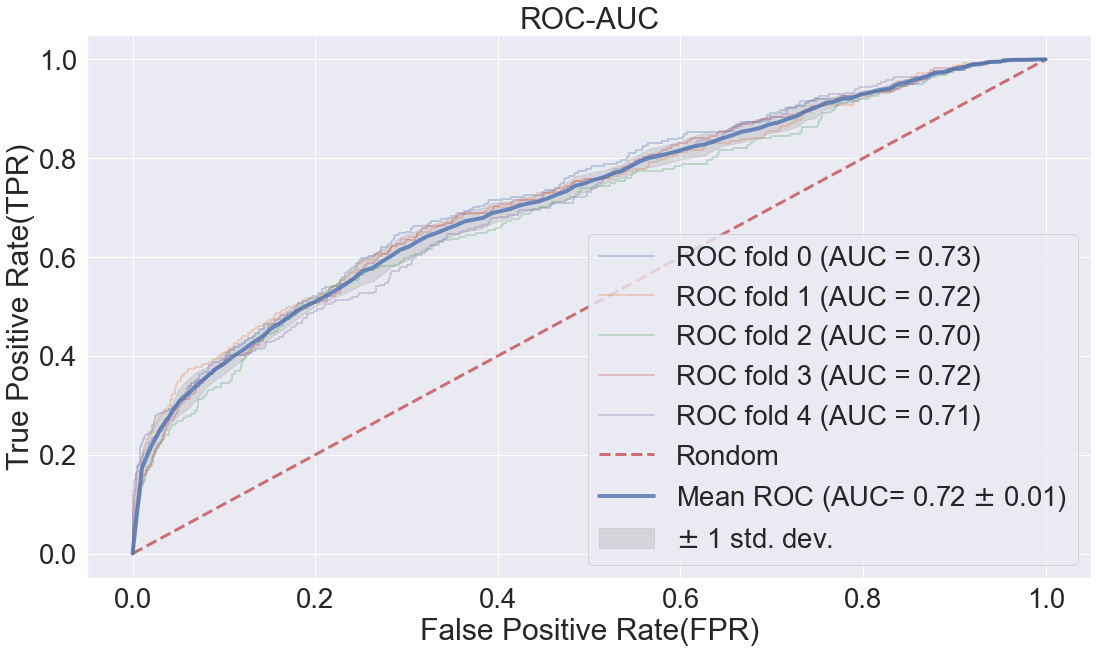

In [100]:
plot_roc_curve(fprs,tprs)
plt.show()


### Feature importance 

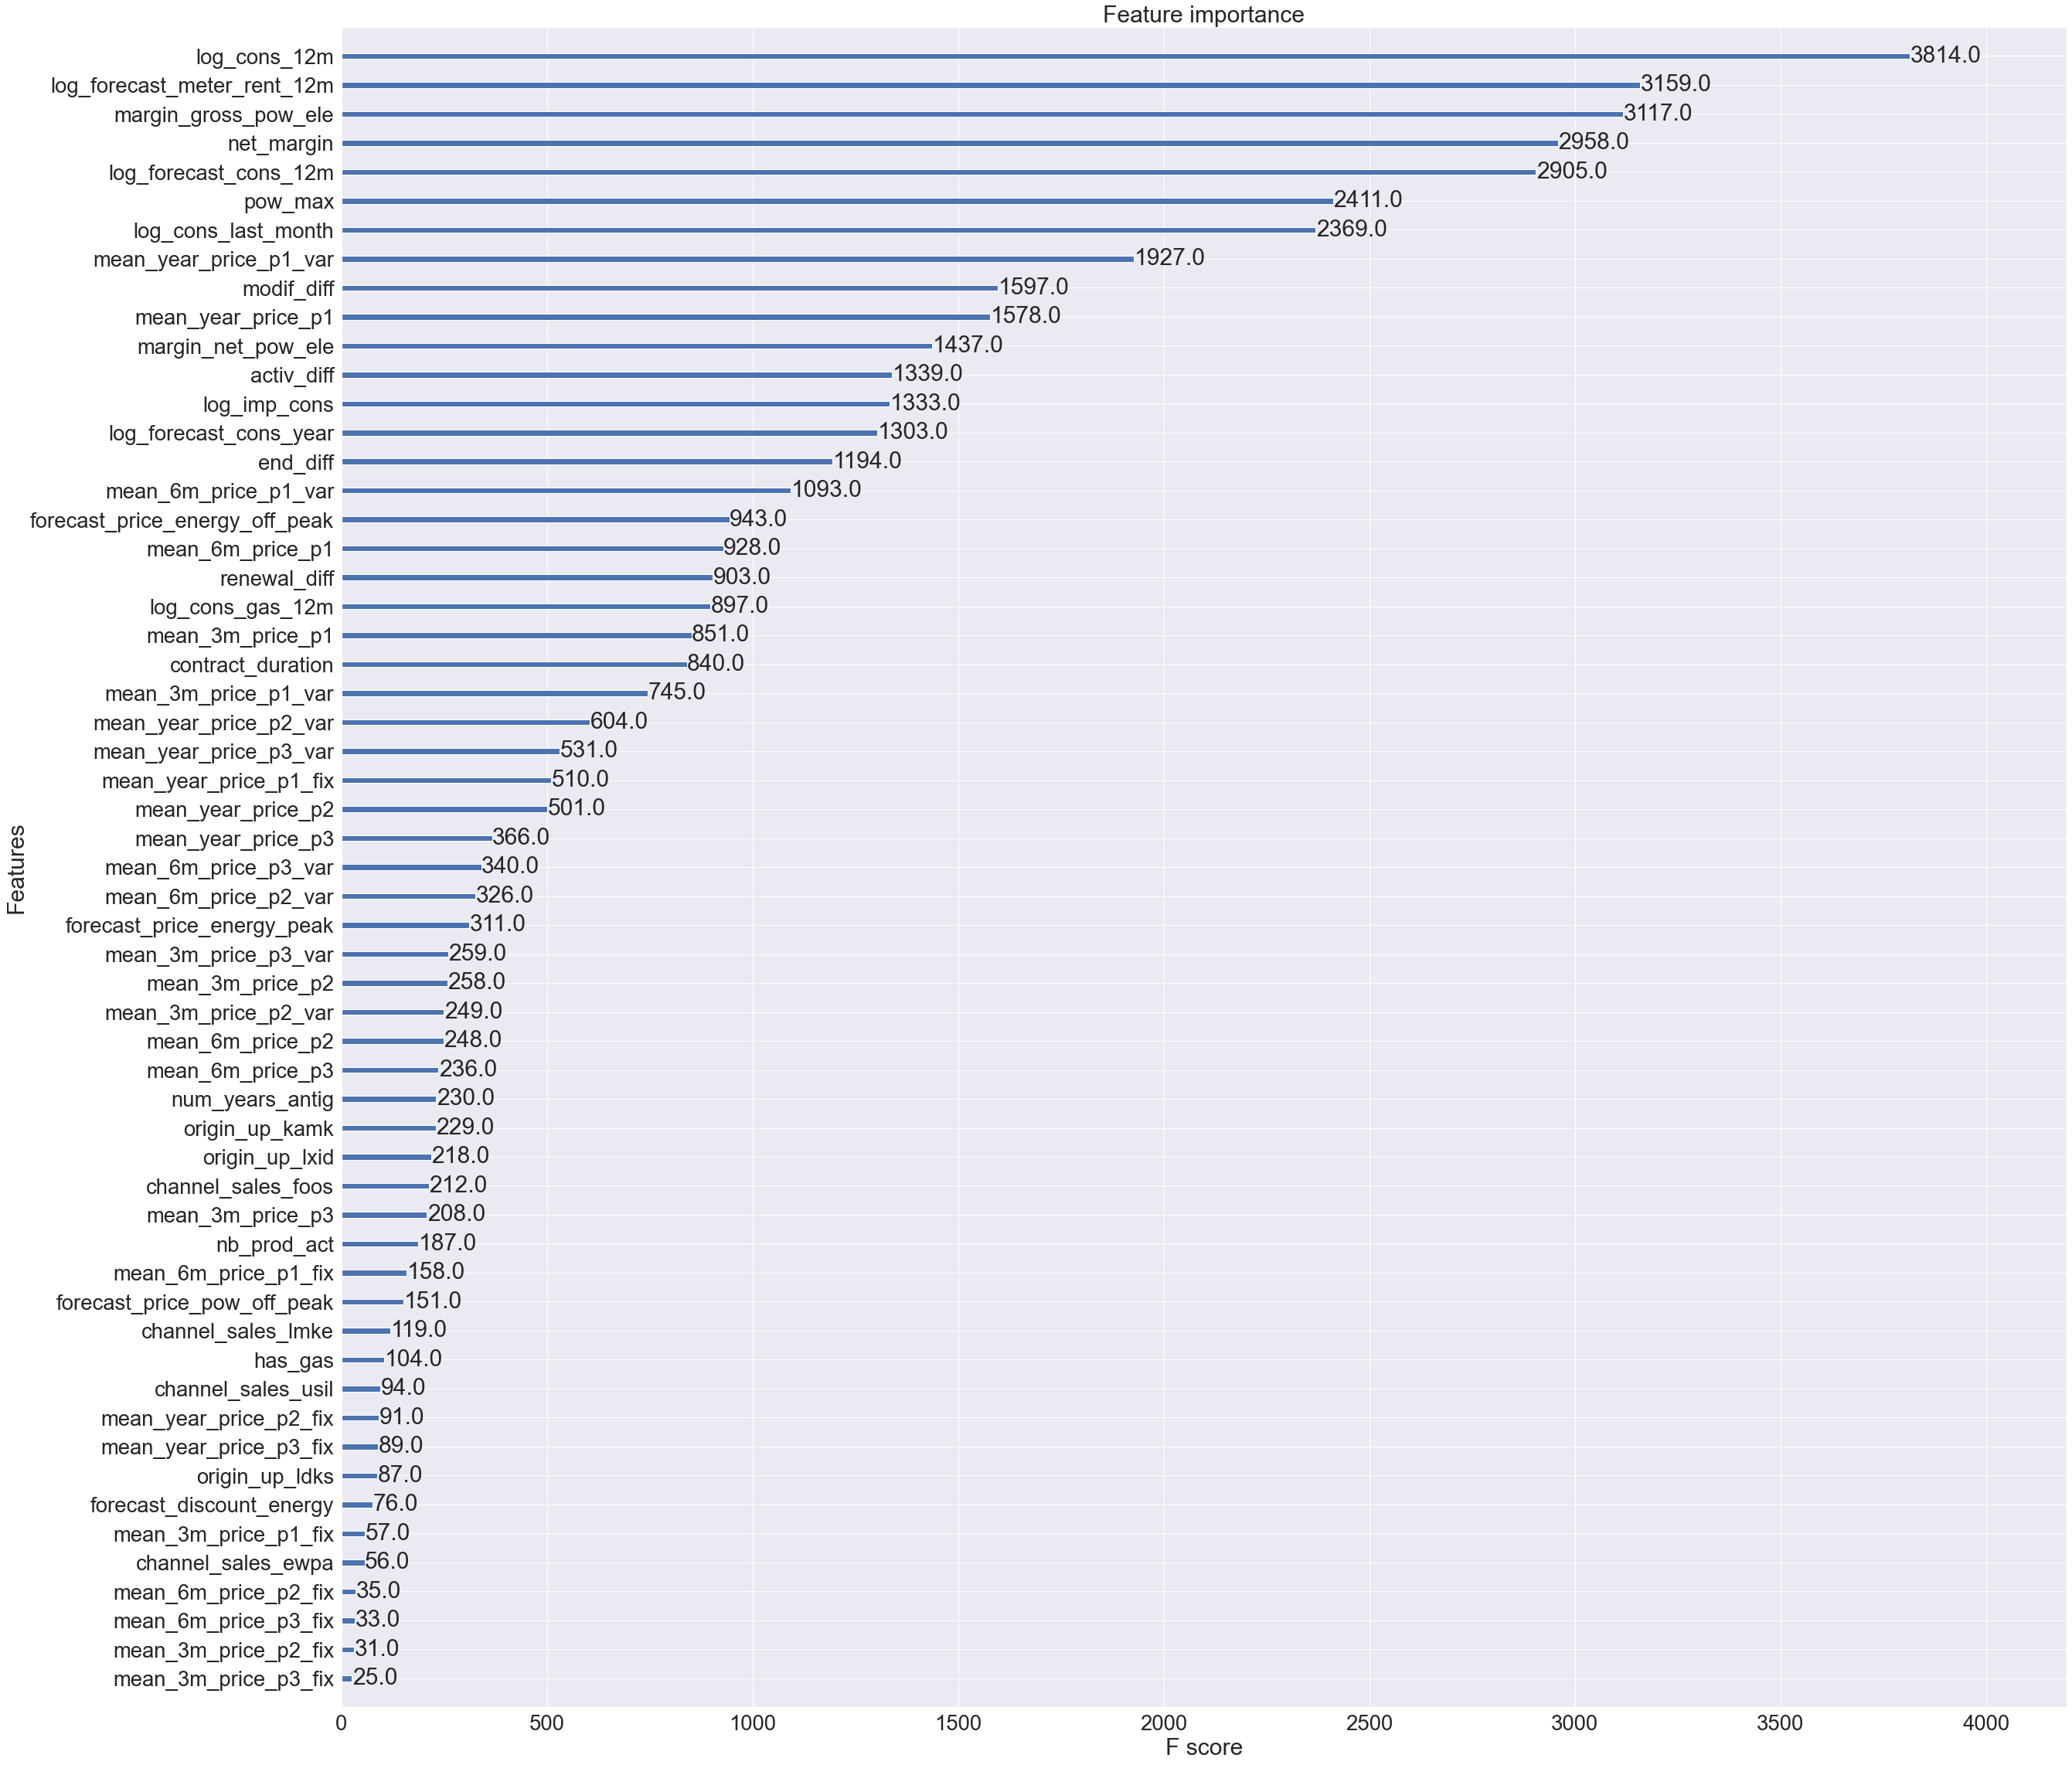

In [101]:
fig,ax=plt.subplots()
fig.set_size_inches(40, 40)
xgb.plot_importance(model_grid,ax=ax);